<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import  load_breast_cancer

In [2]:
def analisis_estadistico_por_label(dataset,columns, label_column, nombre_grafico):
    """
    OBJETIVO DE LA FUNCIÓN: 
    * Mostrar en una grilla la distribución estadística de un conjunto de columnas a partir 
    de un dataset en función de la etiqueta correspondiente.

    OUTPUT DE LA FUNCIÓN:
    * Cada fila de la grilla se encuentra asociada a una variable y la cantidad 
    de columnas es la cantidad de etiquetas consideradas más una columnas/tabla con reporte estadístico 
    de la variable sobre cada etiqueta.
    
    ENTRADAS:
       * dataset 
           - Dataframe con el cual se desea trabajar.
       * columns 
           - Lista de columnas que se desean analizar.
       * label_column
           - string con el nombre de la etiqueta.
       * nombre_grafico
           - string del nombre del gráfico que se usará para mostrar las distribuciones.
           - OPCIONES: 'distplot' o 'boxplot'.
           
    IMPORTANTE: La función trabaja bien con aproximadamente 4 o menos etiquetas, más etiquetas 
    implican más columnas y menos visibilización de la info.
    """

    assert nombre_grafico in ['distplot', 'boxplot'], "argumento nombre_grafico debe ser: 'distplot' o'boxplot'"

    etiquetas_unicas = dataset[label_column].unique()
    # Diccionario que guarda un dataframe por etiqueta
    df_dict = {label: dataset[dataset[label_column]==label] for label in etiquetas_unicas}

    for col in columns:
        col_grilla = len(etiquetas_unicas)+1
        fig, axes = plt.subplots(1, col_grilla, figsize=(6*col_grilla, 5), sharey=True, sharex=True)
        plt.suptitle(col)

        df_describe = pd.DataFrame(columns=etiquetas_unicas)
        for i, (label, df_sample) in enumerate(df_dict.items()):
            df_describe[label] = df_sample[col].describe().round(4)

            if nombre_grafico == 'distplot':
                sns.distplot(df_sample[col].dropna(), kde=False, ax=axes[i]).set_title(label)
            elif nombre_grafico == 'boxplot':
                sns.boxplot(df_sample[col].dropna(), ax=axes[i]).set_title(label)
            axes[i].grid(); axes[i].set_xlabel('')

        #Creacion de tabla con reporte estadistico        
        mpl_table = axes[-1].table(cellText=df_describe.values,
                                   colLabels=df_describe.columns,
                                   rowLabels=df_describe.index,
                                   bbox=[0, 0, 1, 1])
        mpl_table.set_fontsize(12)
        axes[-1].set_title(f'Distribución estadistica - {col}')
        axes[-1].axis('off')

    plt.show()

Para visualizar como trabaja la función utilizaremos el dataset de cancer de sklearn.

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Como el dataset tiene muchas columnas, a modo de ejemplo solo utilizaremos las 10 primeras.

In [4]:
df.columns[:-1]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [5]:
dataset = df
columns = df.columns[:10]
label_column = 'target'
nombre_grafico = 'distplot'

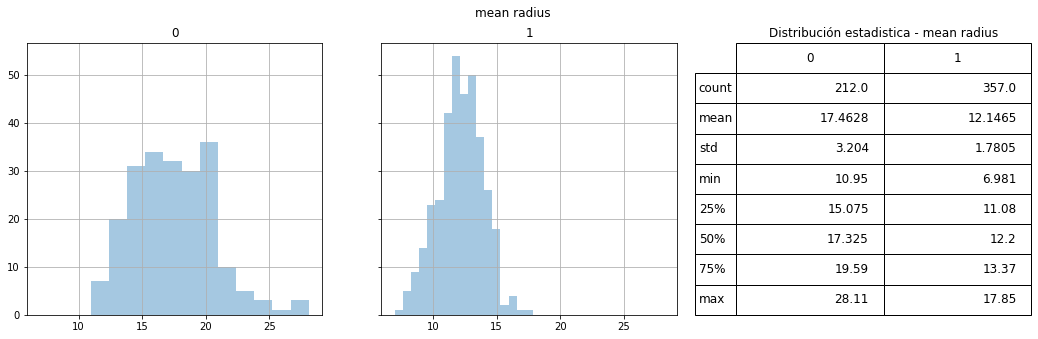

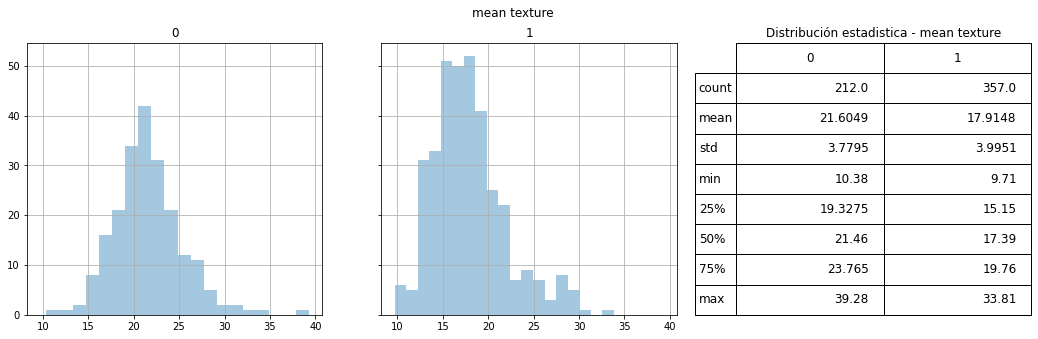

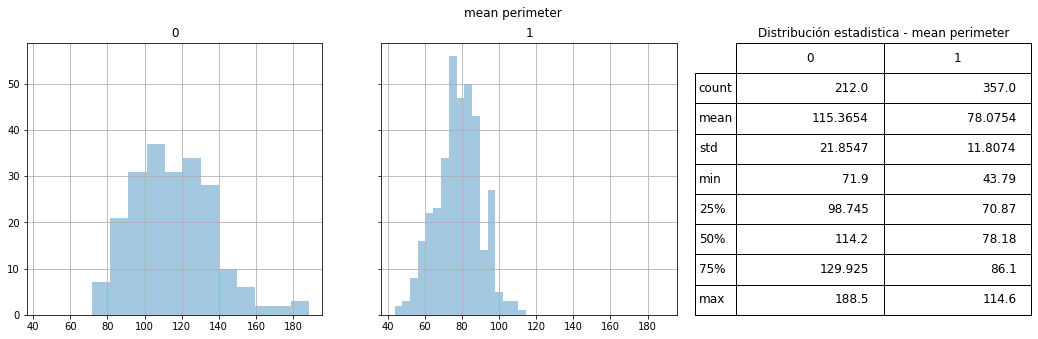

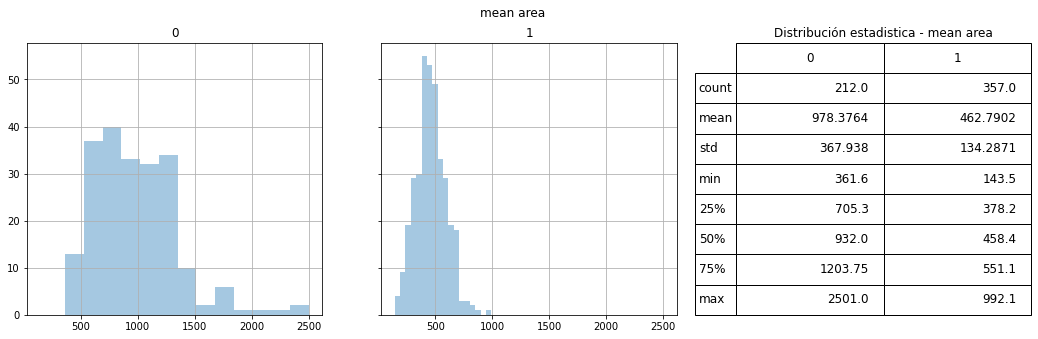

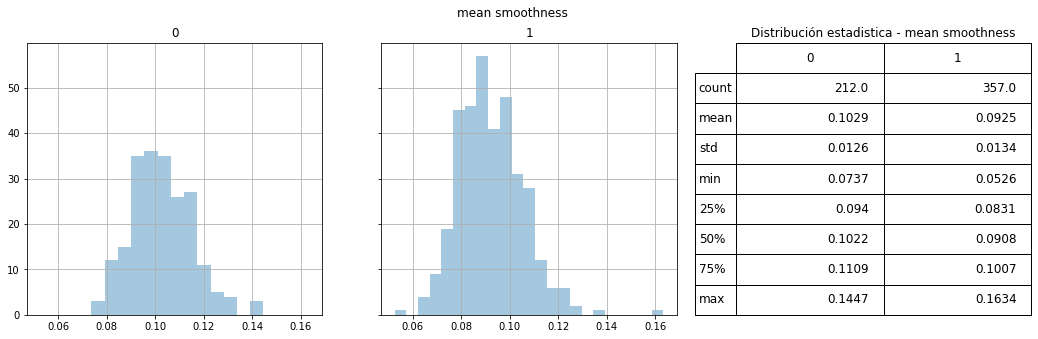

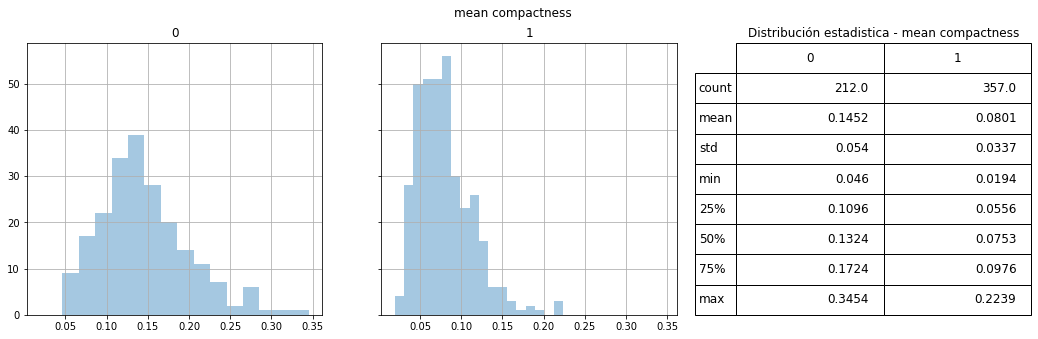

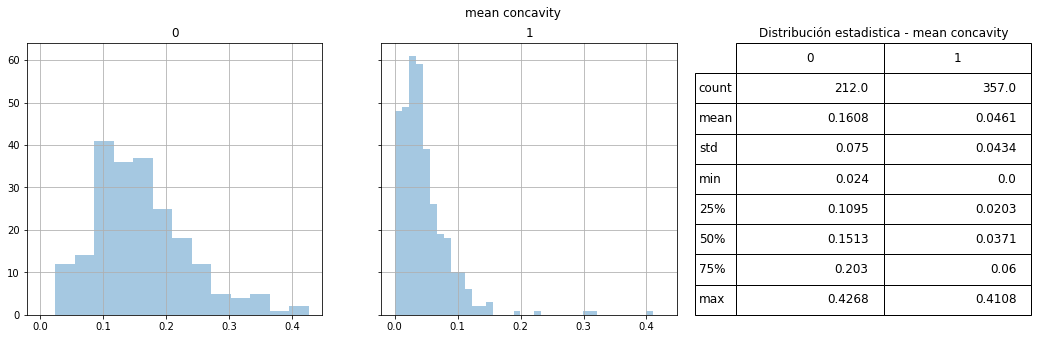

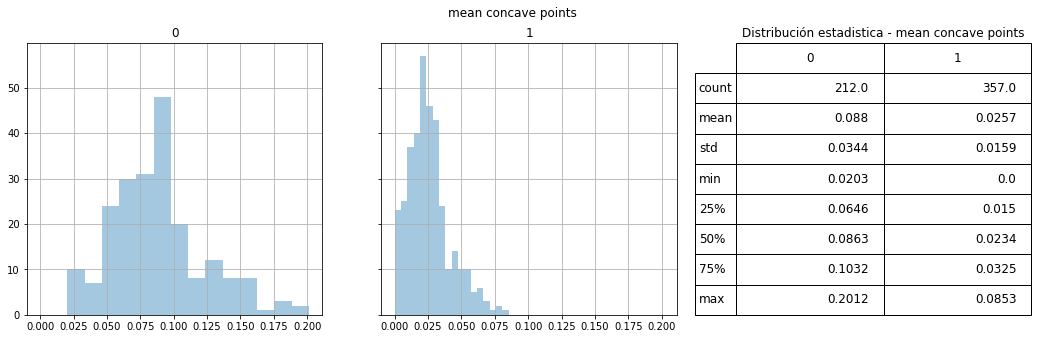

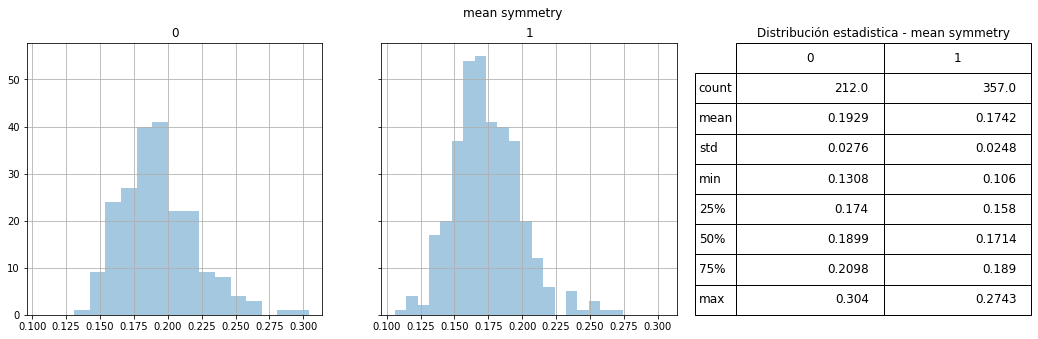

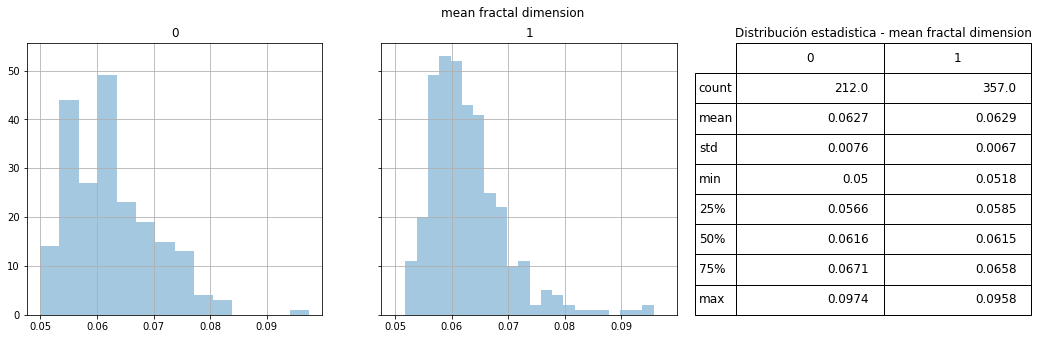

In [6]:
analisis_estadistico_por_label(dataset, columns, label_column, nombre_grafico)